<a href="https://colab.research.google.com/github/Midhat-Fatemah/letsupgrade/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
## Installing essential libraries for EDA 
!pip3 install matplotlib seaborn pandas plotly

In [33]:
##Importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [34]:
## Reading Dataset
df = pd.read_csv("https://raw.githubusercontent.com/Midhat-Fatemah/letsupgrade/main/haberman.csv")

In [63]:
## 
df.shape

(305, 4)

In [36]:
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [37]:
df.columns = ["Age","Op_year","Axil_nodes","Surv_status"]
df

,Age,Op_year,Axil_nodes,Surv_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


***The dataset (305 rows, 4 columns) 305 samples and 4 features.*** 

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Age          305 non-null    int64
 1   Op_year      305 non-null    int64
 2   Axil_nodes   305 non-null    int64
 3   Surv_status  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


***Since there are no null values in the dataset, there is no need for imputation.***

In [39]:
df.describe()

,Age,Op_year,Axil_nodes,Surv_status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


***1. The age of the patients vary from 30 to 83 with the median of 52.***

***2. Although the maximum number of positive lymph nodes observed is 52, nearly 75% of the patients have less than 5 positive lymph nodes and nearly 25% of the patients have no positive lymph nodes.***

In [40]:
df['Surv_status'].value_counts()

1    224
2     81
Name: Surv_status, dtype: int64

***The target column(Survival status) is imbalanced with 73% of values are '1'***

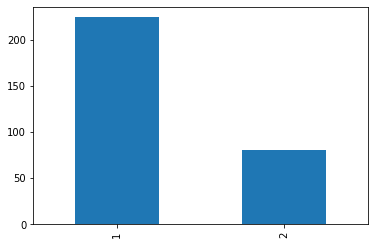

In [41]:
df['Surv_status'].value_counts().plot.bar()

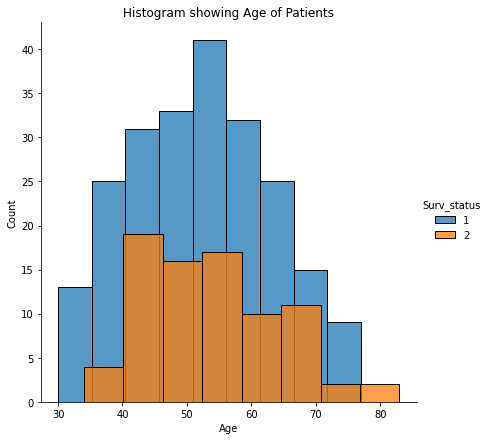

In [42]:
sns.FacetGrid(df, hue="Surv_status",height = 6).map(sns.histplot,"Age").add_legend();
plt.title('Histogram showing Age of Patients',fontsize = 12)
plt.show();

***1. Major overlapping is observed, which tells us that survival chances are irrespective of a person’s age.***

***2. Although there is overlapping we can vaguely tell that people whose age is in the range 30–40 are more likely to survive, and 40–60 are less likely to survive. While people whose age is in the range 60–75 have equal chances of surviving and not surviving.***

***3. From the above figure, we can't come to an conclusion. We cannot decide the survival chances of a patient just by considering the age parameter.***

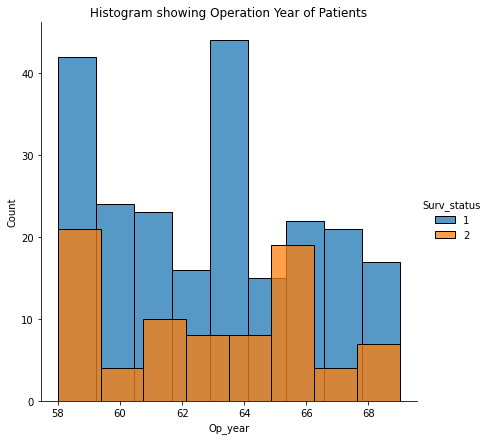

In [43]:
sns.FacetGrid(df, hue="Surv_status",height = 6).map(sns.histplot,"Op_year").add_legend();
plt.title('Histogram showing Operation Year of Patients',fontsize = 12)
plt.show();

***1. There is major overlapping observed as compared to "AGE" parameter. This graph only tells how many of the operations were successful and how many weren’t. This cannot be a parameter to decide the patient’s survival chances.***

***2. However, it can be observed that in the years 1960 and 1965 there were more unsuccessful operations.***

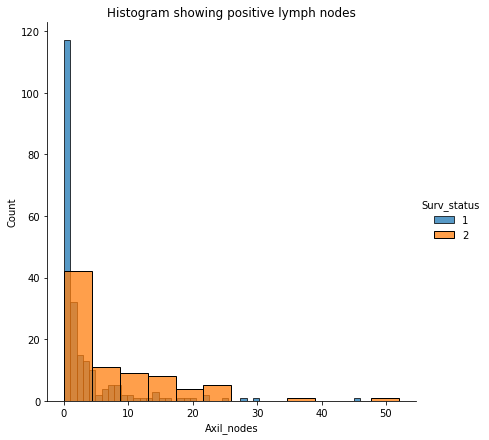

In [44]:
sns.FacetGrid(df, hue="Surv_status",height = 6).map(sns.histplot,"Axil_nodes").add_legend();
plt.title('Histogram showing positive lymph nodes',fontsize = 12)
plt.show();

***Patients with no nodes or 1 node are more likely to survive. There are very few chances of surviving if there are 25 or more nodes.***

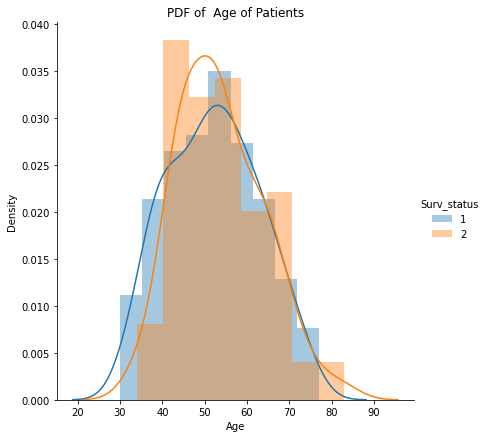

In [45]:
sns.FacetGrid(df, hue="Surv_status",height = 6).map(sns.distplot,"Age").add_legend();
plt.title('PDF of  Age of Patients',fontsize = 12)
plt.show();

***As we can see that there is a lot of overlapping between the persons surviving and dying, so not much can be concluded.***

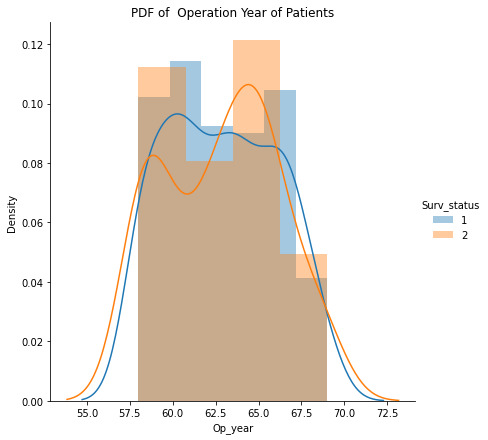

In [46]:
sns.FacetGrid(df, hue="Surv_status",height = 6).map(sns.distplot,"Op_year").add_legend();
plt.title('PDF of  Operation Year of Patients',fontsize = 12)
plt.show();

***As we can see that there is a lot of overlapping between the persons surviving and dying, so not much can be concluded.***

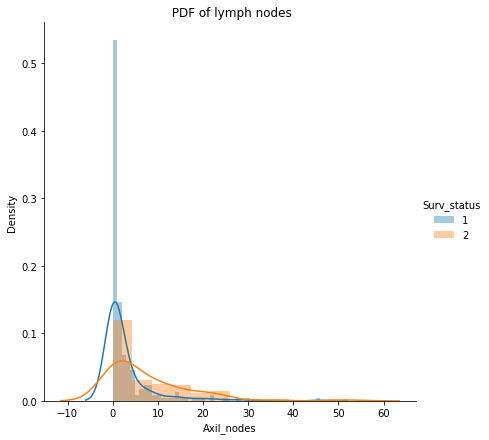

In [47]:
sns.FacetGrid(df, hue="Surv_status",height = 6).map(sns.distplot,"Axil_nodes").add_legend();
plt.title(' PDF of lymph nodes',fontsize = 12)
plt.show();

***We can see that maximum survival occurs when the number of axilnodes is 0-1, and survival rate is gradually declining. But when the axilnodes>20, there is more chance of death.***

[0.04918033 0.08852459 0.15081967 0.17377049 0.18032787 0.13442623
 0.13442623 0.05901639 0.02295082 0.00655738]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


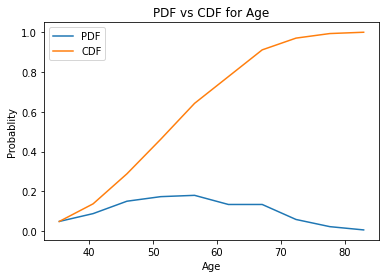

In [48]:
count, bin = np.histogram(df["Age"],bins=10,density = True)
pdf = count/(sum(count))
print(pdf);
print(bin);
cdf = np.cumsum(pdf)
plt.plot(bin[1:],pdf,label="PDF");
plt.plot(bin[1:],cdf,label="CDF");
plt.xlabel("Age")
plt.ylabel("Probablity")
plt.title("PDF vs CDF for Age")
plt.legend(loc='best')
plt.show()

[0.20655738 0.09180328 0.0852459  0.07540984 0.09836066 0.09836066
 0.09180328 0.09180328 0.08196721 0.07868852]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


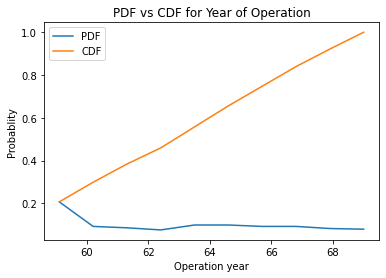

In [49]:
count, bin = np.histogram(df["Op_year"],bins=10,density = True)
pdf = count/(sum(count))
print(pdf);
print(bin);
cdf = np.cumsum(pdf)
plt.plot(bin[1:],pdf,label="PDF");
plt.plot(bin[1:],cdf,label="CDF");
plt.xlabel("Operation year")
plt.ylabel("Probablity")
plt.title("PDF vs CDF for Year of Operation")
plt.legend(loc='best')
plt.show()

[0.7704918  0.09836066 0.05901639 0.02622951 0.0295082  0.00655738
 0.00327869 0.         0.00327869 0.00327869]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


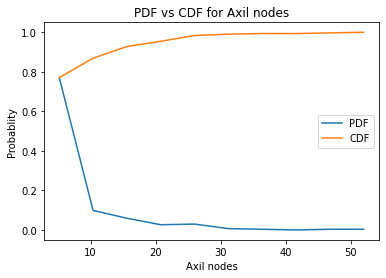

In [50]:
count, bin = np.histogram(df["Axil_nodes"],bins=10,density = True)
pdf = count/(sum(count))
print(pdf);
print(bin);
cdf = np.cumsum(pdf)
plt.plot(bin[1:],pdf,label="PDF");
plt.plot(bin[1:],cdf,label="CDF");
plt.xlabel("Axil nodes")
plt.ylabel("Probablity")
plt.title("PDF vs CDF for Axil nodes")
plt.legend(loc='best')
plt.show()

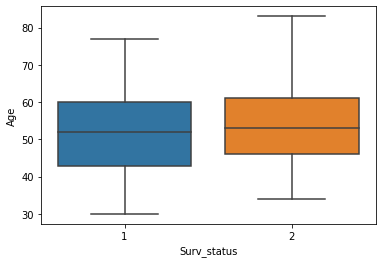

In [51]:
sns.boxplot(x='Surv_status',y='Age', data=df)
plt.show()

***1. There are no outliers and much can be derived from this plot.***

***2. Age of survival lies between(42-60).***

***3. Age of non survival lies between(45-61).***

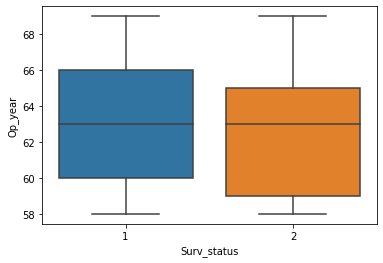

In [52]:
sns.boxplot(x='Surv_status',y='Op_year', data=df)
plt.show()

***1. There are no outliers and much can be derived from this plot.***

***2. Operation year of survived patients lies between(1960-1966).***

***3. Operation year of non survived patients lies between(1959-1965)***

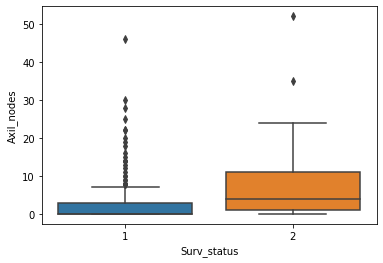

In [53]:
sns.boxplot(x='Surv_status',y='Axil_nodes', data=df)
plt.show()

***1. There are a lot of outliers so median is preferred over mean.***

***2. AxilNodes of survival lies between(0-4).***

***3. Age of non survival lies between(2-11).***

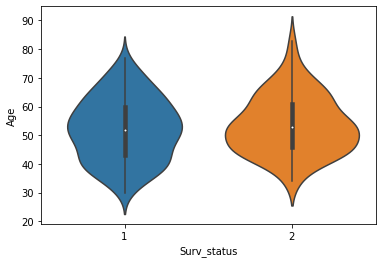

In [54]:
sns.violinplot(x='Surv_status',y='Age', data=df)
plt.show()

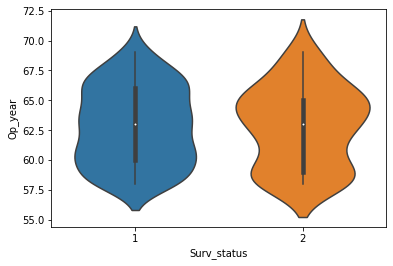

In [55]:
sns.violinplot(x='Surv_status',y='Op_year', data=df)
plt.show()

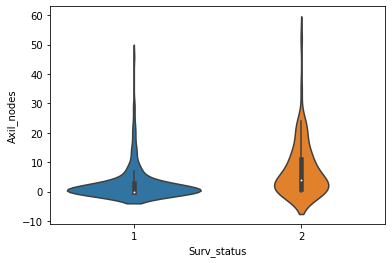

In [56]:
sns.violinplot(x='Surv_status',y='Axil_nodes', data=df)
plt.show()

<function matplotlib.pyplot.show>

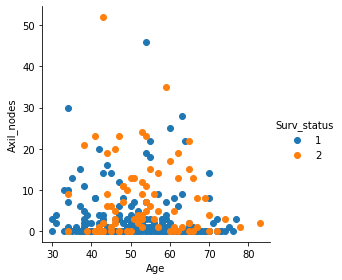

In [57]:
sns.FacetGrid(df, hue="Surv_status", height=4).map(plt.scatter, "Age", "Axil_nodes").add_legend()
plt.show

***1. When axilnodes< 20 & 30<age<=40 then the chances of survival are much more.***

***2. When axilnodes< 10 & 40<age<=70 then the chances of survival and non survival are almost the same.***

***3. When axilnodes< 10 & 60<age<=70 then the chances of non survival are more.***

***4. When 10<axilnodes< 20 & 30<age<=50 then the chances of survival are more.***

***5. When 10<axilnodes< 20 & 50<age<=70 then the chances of non survival are more.***

<function matplotlib.pyplot.show>

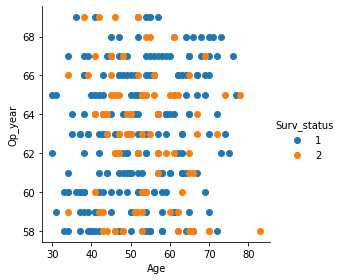

In [58]:
sns.FacetGrid(df, hue="Surv_status", height=4).map(plt.scatter, "Age", "Op_year").add_legend()
plt.show

<function matplotlib.pyplot.show>

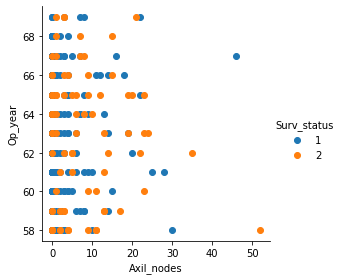

In [59]:
sns.FacetGrid(df, hue="Surv_status", height=4).map(plt.scatter, "Axil_nodes", "Op_year").add_legend()
plt.show

In [60]:
px.scatter_3d(df, x = "Age", y = "Axil_nodes", z = "Op_year", color= "Surv_status")

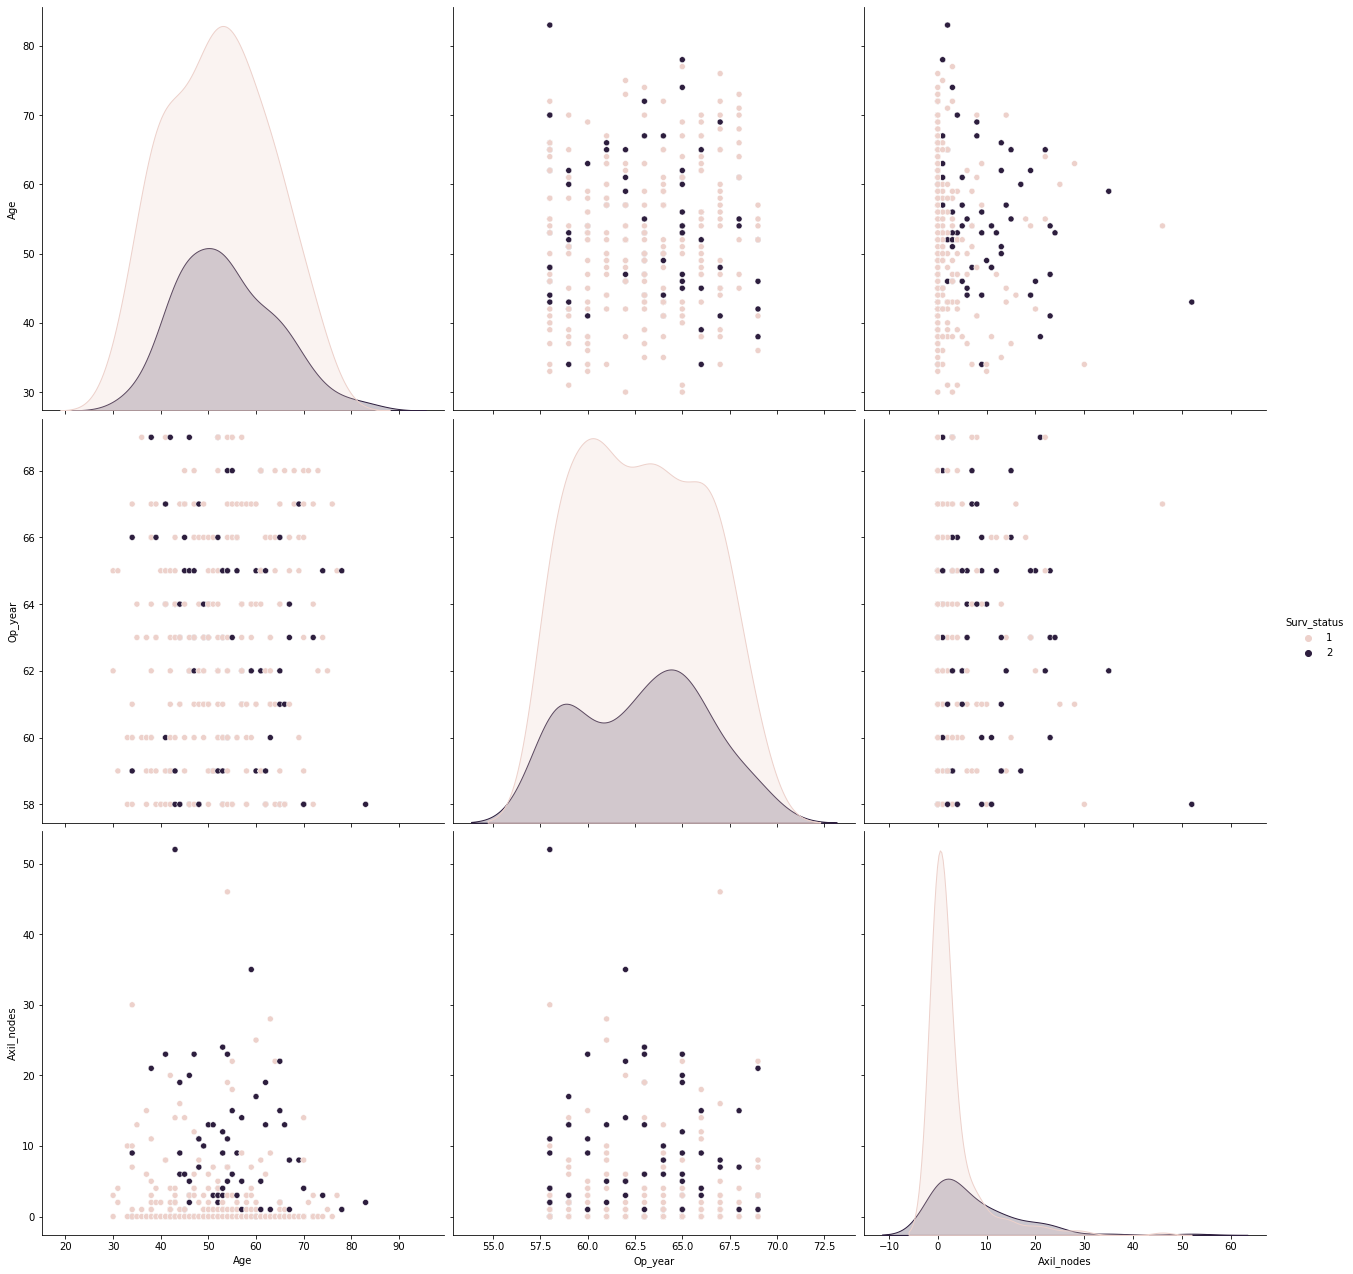

In [61]:
sns.pairplot(df, hue = "Surv_status", height=6)
plt.show()

***1. From fig in (row 1,col 3), it is clear that if the number of axilnods is very less roughly between(0-5), then the chances of survival are more.***

***2. Age and Axilnodes turned out to be the more important factors in determining the survival.***